In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/IRFAN/Downloads/winter_sem/explainable_ml/Metro_Interstate_Traffic_Volume.csv")

In [4]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
# Assuming 'date_time' column is in pandas DataFrame 'df'
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour

df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

In [7]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [8]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,day_of_week,month
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355,11.398162,2.984980,6.506037
std,13.338232,44.789133,0.008168,39.015750,1986.860670,6.940238,2.005941,3.400221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000,5.000000,1.000000,4.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000,11.000000,3.000000,7.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000,17.000000,5.000000,9.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,23.000000,6.000000,12.000000


In [9]:
df['weather_main'].isnull().any()

False

In [10]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [11]:
#def convert_clouds_to_float(value):
    #if value == 'Clouds':
        #return 1.0
    #return value

#df['weather_main'] = df['weather_main'].apply(convert_clouds_to_float)

In [12]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [13]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [14]:
none_count = (df['holiday'] == 'None').sum()

In [15]:
none_count

48143

In [16]:
min_traffic_volume_none = df[df['holiday'] == 'None']['traffic_volume'].min()

In [17]:
print(f"Minimum 'traffic_volume' on non-holiday days: {min_traffic_volume_none}")

Minimum 'traffic_volume' on non-holiday days: 0


In [18]:
df['date_time'].unique()

array(['2012-10-02T09:00:00.000000000', '2012-10-02T10:00:00.000000000',
       '2012-10-02T11:00:00.000000000', ...,
       '2018-09-30T21:00:00.000000000', '2018-09-30T22:00:00.000000000',
       '2018-09-30T23:00:00.000000000'], dtype='datetime64[ns]')

In [19]:
new_df = df

In [20]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [21]:
#new_df=new_df.sort_values(['traffic_volume'], ascending=True)

In [22]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [23]:
new_df.head(100)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,280.00,0.0,0.0,75,Clouds,broken clouds,2012-10-06 15:00:00,5153,15,5,10
96,None,279.06,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 16:00:00,5024,16,5,10
97,None,278.91,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 17:00:00,4779,17,5,10
98,None,278.39,0.0,0.0,90,Clouds,overcast clouds,2012-10-06 18:00:00,4362,18,5,10


In [24]:
new_df.duplicated().sum()

17

In [25]:
# Check for duplicates based on specific columns
duplicated_mask_subset = df.duplicated(subset=['holiday', 'temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','date_time','traffic_volume','hour','day_of_week'])

# Filter the DataFrame to get the duplicated rows based on specified columns
duplicated_rows_subset = df[duplicated_mask_subset]

print("Duplicated Rows based on specified columns:")
print(duplicated_rows_subset)


Duplicated Rows based on specified columns:
      holiday     temp  rain_1h  snow_1h  clouds_all  weather_main  \
18697    None  286.290      0.0      0.0           1         Clear   
23851    None  289.060      0.0      0.0          90        Clouds   
26784    None  289.775      0.0      0.0          56        Clouds   
26980    None  287.860      0.0      0.0           0         Clear   
27171    None  279.287      0.0      0.0          56        Clouds   
28879    None  267.890      0.0      0.0          90          Snow   
29268    None  254.220      0.0      0.0           1         Clear   
34711    None  295.010      0.0      0.0          40        Clouds   
34967    None  292.840      0.0      0.0           1         Clear   
34969    None  294.520      0.0      0.0           1         Clear   
34971    None  295.770      0.0      0.0          75        Clouds   
34973    None  296.950      0.0      0.0           1  Thunderstorm   
37572    None  288.890      0.0      0.0      

# convert kelvin to c

In [26]:
new_df['temp']= new_df['temp']-273.15

In [27]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [28]:
#new_df=new_df.sort_values(['temp'], ascending=True)

In [29]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [30]:
new_df = new_df.loc[new_df.temp > -250]

In [31]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [32]:
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = new_df)
plt.show()

TypeError: boxplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

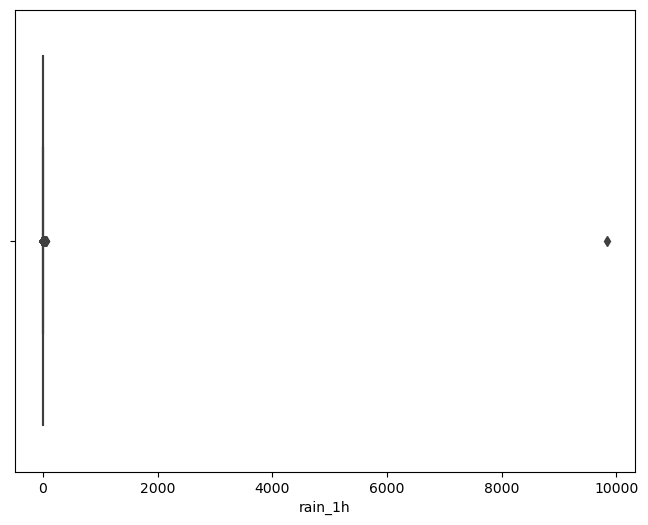

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rain_1h', data=new_df)  # Assuming 'rain_1h' is the column you want to visualize
plt.show()

In [35]:
new_df = new_df.loc[new_df.rain_1h<2000]
#new_df1 = new_df.loc[new_df.rain_1h>0]

In [ ]:
new_df

In [36]:
new_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,None,10.30,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19,6,9
48200,None,9.61,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20,6,9
48201,None,9.58,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21,6,9
48202,None,8.94,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22,6,9


In [ ]:
new_df['rain_1h'].unique()

In [ ]:
new_df.snow_1h[new_df.snow_1h>0].count()

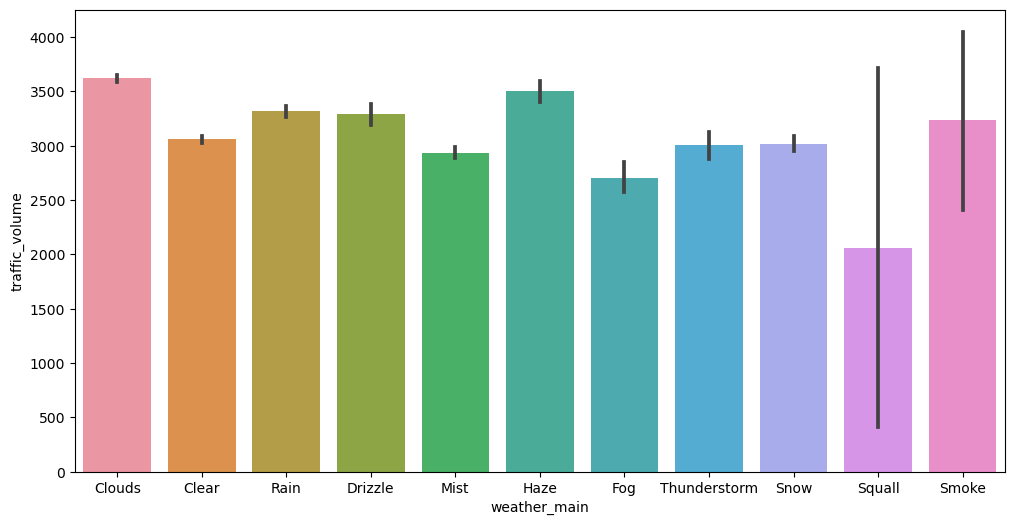

In [37]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(12,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = new_df)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = new_df)
plt.show()

In [ ]:
sns.set()
fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,1, figsize=(20,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4)
new_df[:168].traffic_volume.plot(ax=ax0)
new_df[(168*13):(168*14)].traffic_volume.plot(ax=ax1)
new_df[(168*26):(168*27)].traffic_volume.plot(ax=ax2)
new_df[(168*39):(168*40)].traffic_volume.plot(ax=ax3)
plt.show()

In [ ]:
new_df['hour'].unique()

In [38]:
new_df=new_df.sort_values(['hour','traffic_volume'], ascending=False)

In [ ]:
new_df

In [ ]:
# Assuming 'new_df' is your DataFrame
value = new_df.iloc[7280]['traffic_volume']
print(f"Value at position 7280 in 'traffic_volume' column: {value}")


In [ ]:
new_df.iloc[2740]

In [39]:
# Assuming 'new_df' is your DataFrame
max_traffic_row_index = new_df['traffic_volume'].idxmax()

# Use loc to get the row with the maximum traffic volume
max_traffic_row = new_df.loc[max_traffic_row_index]

print("Row with Maximum Traffic Volume:")
print(max_traffic_row)


Row with Maximum Traffic Volume:
holiday                               None
temp                                  -2.4
rain_1h                                0.0
snow_1h                                0.0
clouds_all                              90
weather_main                        Clouds
weather_description        overcast clouds
date_time              2017-03-09 16:00:00
traffic_volume                        7280
hour                                    16
day_of_week                              3
month                                    3
Name: 31615, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the influence factors and traffic values
plt.figure(figsize=(12, 8))

# Plot for Hour
plt.subplot(2, 2, 1)
sns.lineplot(x='hour', y='traffic_volume', data=new_df)

# Plot for Day of Week
plt.subplot(2, 2, 2)
sns.lineplot(x='day_of_week', y='traffic_volume', data=new_df)

# Add more subplots for other influence factors...

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(20, 8))

# Plot for Weather Main
plt.subplot(2, 2, 1)
sns.barplot(x='weather_main', y='traffic_volume', data=new_df)

# Plot for Holiday
plt.subplot(2, 2, 2)
sns.barplot(x='holiday', y='traffic_volume', data=new_df)

# Add more subplots for other influence factors...

plt.tight_layout()
plt.show()


In [ ]:
pip install xgboost

# Training #

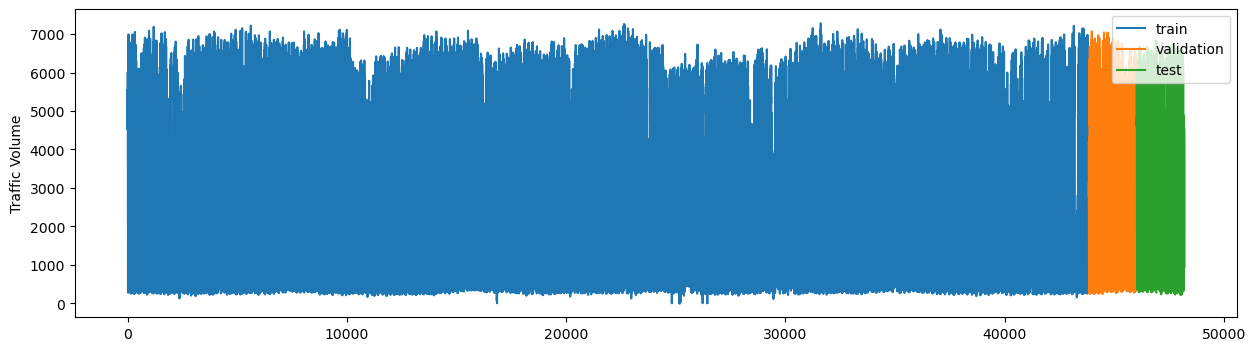

In [40]:
train = df[:-4368]
valid = df[-4368:-2184]
test = df[-2184:]
plt.figure(figsize=(15,4))
plt.plot(train.index.values, train.traffic_volume.values,\
label='train')
plt.plot(valid.index.values, valid.traffic_volume.values,\
label='validation')
plt.plot(test.index.values, test.traffic_volume.values,\
label='test')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

In [41]:
new_df1=new_df
# Convert categorical variables into numerical format using one-hot encoding
new_df = pd.get_dummies(new_df, columns=['weather_main', 'weather_description', 'holiday'])

In [42]:
print(new_df.dtypes)

temp                                   float64
rain_1h                                float64
snow_1h                                float64
clouds_all                               int64
date_time                       datetime64[ns]
                                     ...      
holiday_None                             uint8
holiday_State Fair                       uint8
holiday_Thanksgiving Day                 uint8
holiday_Veterans Day                     uint8
holiday_Washingtons Birthday             uint8
Length: 70, dtype: object


In [ ]:
# Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(new_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

In [43]:
# Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(new_df[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])


In [44]:
new_df

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,hour,day_of_week,month,weather_main_Clear,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
36444,0.890393,-0.129891,-0.027231,-1.239888,2017-08-19 23:00:00,4072,23,5,8,1,...,0,0,0,0,0,1,0,0,0,0
14182,-0.005019,-0.129891,-0.027231,-1.239888,2014-05-09 23:00:00,4030,23,4,5,1,...,0,0,0,0,0,1,0,0,0,0
35980,0.693686,-0.129891,-0.027231,-1.239888,2017-08-05 23:00:00,3893,23,5,8,1,...,0,0,0,0,0,1,0,0,0,0
5846,0.615003,-0.129891,-0.027231,-1.239888,2013-05-07 23:00:00,3874,23,1,5,1,...,0,0,0,0,0,1,0,0,0,0
48177,-0.074260,-0.129891,-0.027231,1.041394,2018-09-29 23:00:00,3856,23,5,9,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,0.046125,-0.129891,-0.027231,-1.239888,2016-05-02 00:00:00,171,0,0,5,1,...,0,0,0,0,0,1,0,0,0,0
26224,0.522157,-0.129891,-0.027231,-1.239888,2016-09-01 00:00:00,11,0,3,9,1,...,0,0,0,0,0,1,0,0,0,0
26439,0.998976,-0.129891,-0.027231,-1.239888,2016-09-08 00:00:00,7,0,3,9,1,...,0,0,0,0,0,1,0,0,0,0
25157,1.147686,-0.129891,-0.027231,-1.239888,2016-07-23 00:00:00,6,0,5,7,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

X = new_df.drop(['traffic_volume', 'date_time' ], axis=1)
y = new_df.traffic_volume
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
model = XGBRegressor(n_estimators=600, learning_rate=0.3, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2: {r2}")


Mean Absolute Error (MAE) 262.7033964867401
Mean Squared Error (MSE): 185122.05037958216
Root Mean Squared Error (RMSE): 430.25812064339027
R^2: 0.9529803728761941


In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48193 entries, 36444 to 25192
Data columns (total 70 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   temp                                                     48193 non-null  float64       
 1   rain_1h                                                  48193 non-null  float64       
 2   snow_1h                                                  48193 non-null  float64       
 3   clouds_all                                               48193 non-null  float64       
 4   date_time                                                48193 non-null  datetime64[ns]
 5   traffic_volume                                           48193 non-null  int64         
 6   hour                                                     48193 non-null  int64         
 7   day_of_week                                  

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assuming 'new_df' is your DataFrame

new_df['y_test'] = new_df['traffic_volume']

# Splitting the data
X = new_df['hour']
y = new_df['y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
# Standard scaling on the predictions
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(X, y, label='y_test', color='blue')

# Plotting scaled predictions
plt.scatter(new_df['hour'].iloc[X_test.index], y_pred_scaled, label='y_scaled_pred', color='green', marker='x')

# Plotting original predictions
plt.scatter(new_df['hour'].iloc[X_test.index], y_pred, label='y_pred_real', color='red', marker='^')

# Adding labels and legend
plt.xlabel('Hours')
plt.ylabel('Traffi Volume')
plt.legend()
plt.title('Comparison of Actual, Scaled Predictions, and Original Predictions')

plt.show()

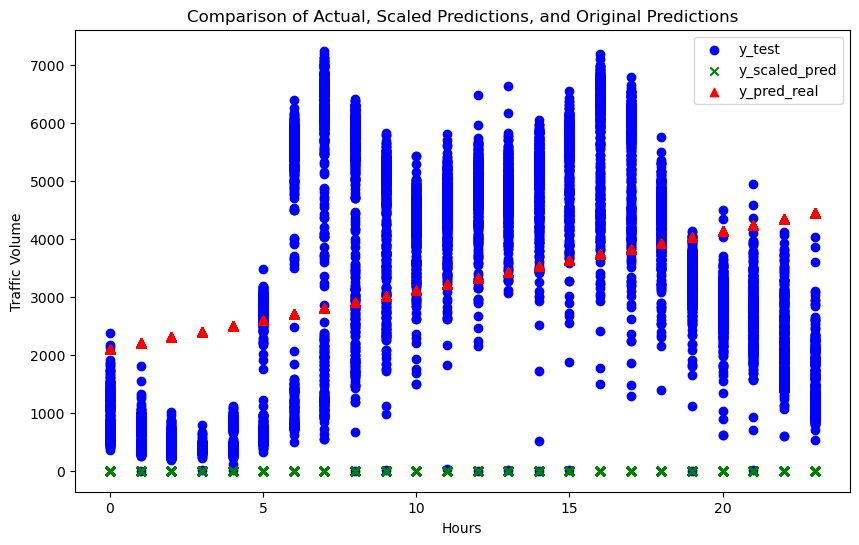

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming 'new_df' is your DataFrame
new_df['y_test'] = new_df['traffic_volume']

# Splitting the data
X = new_df['hour']
y = new_df['y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Training a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Standard scaling on the predictions
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(X_test.flatten(), y_test.values, label='y_test', color='blue')

# Plotting scaled predictions
plt.scatter(X_test.flatten(), y_pred_scaled, label='y_scaled_pred', color='green', marker='x')

# Plotting original predictions
plt.scatter(X_test.flatten(), y_pred, label='y_pred_real', color='red', marker='^')

# Adding labels and legend
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Comparison of Actual, Scaled Predictions, and Original Predictions')

plt.show()


In [ ]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE) {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2: {r2}")

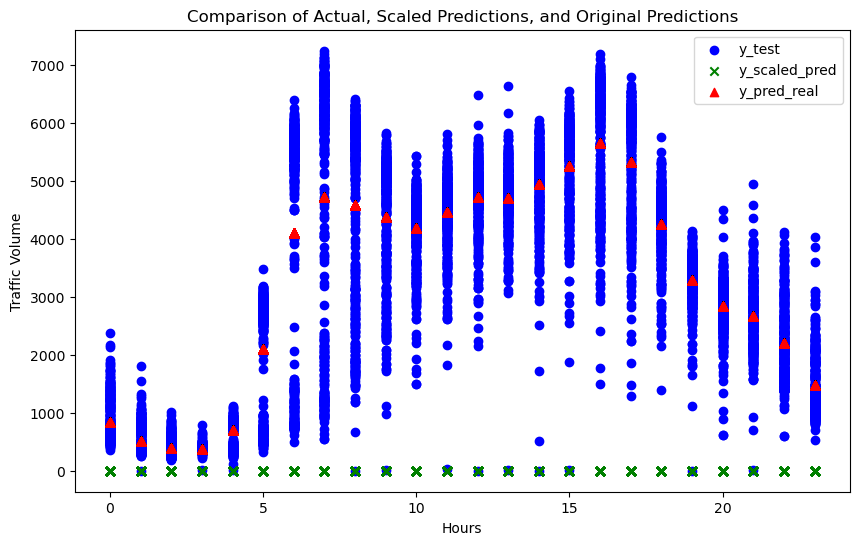

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming 'new_df' is your DataFrame
new_df['y_test'] = new_df['traffic_volume']

# Splitting the data
X = new_df[['hour']]
y = new_df['y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Standard scaling on the predictions
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(X_test, y_test, label='y_test', color='blue')

# Plotting scaled predictions
plt.scatter(X_test, y_pred_scaled, label='y_scaled_pred', color='green', marker='x')

# Plotting original predictions
plt.scatter(X_test, y_pred, label='y_pred_real', color='red', marker='^')

# Adding labels and legend
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Comparison of Actual, Scaled Predictions, and Original Predictions')

plt.show()


In [50]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE) {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2: {r2}")

Mean Absolute Error (MAE) 636.6385872299475
Mean Squared Error (MSE): 876050.4566332464
Root Mean Squared Error (RMSE): 935.9756709622566
R^2: 0.7771172864405594


In [ ]:
# Print all holiday data sets
print(df['holiday'].value_counts())

# Check if the 'holiday' column contains any non-numeric values
# If yes, convert them to numeric or handle them accordingly


In [ ]:
new_df1 

C:\Users\IRFAN\AppData\Local\Temp\ipykernel_2568\3054523997.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=new_df1, x='holiday', y='traffic_volume', ci=None)


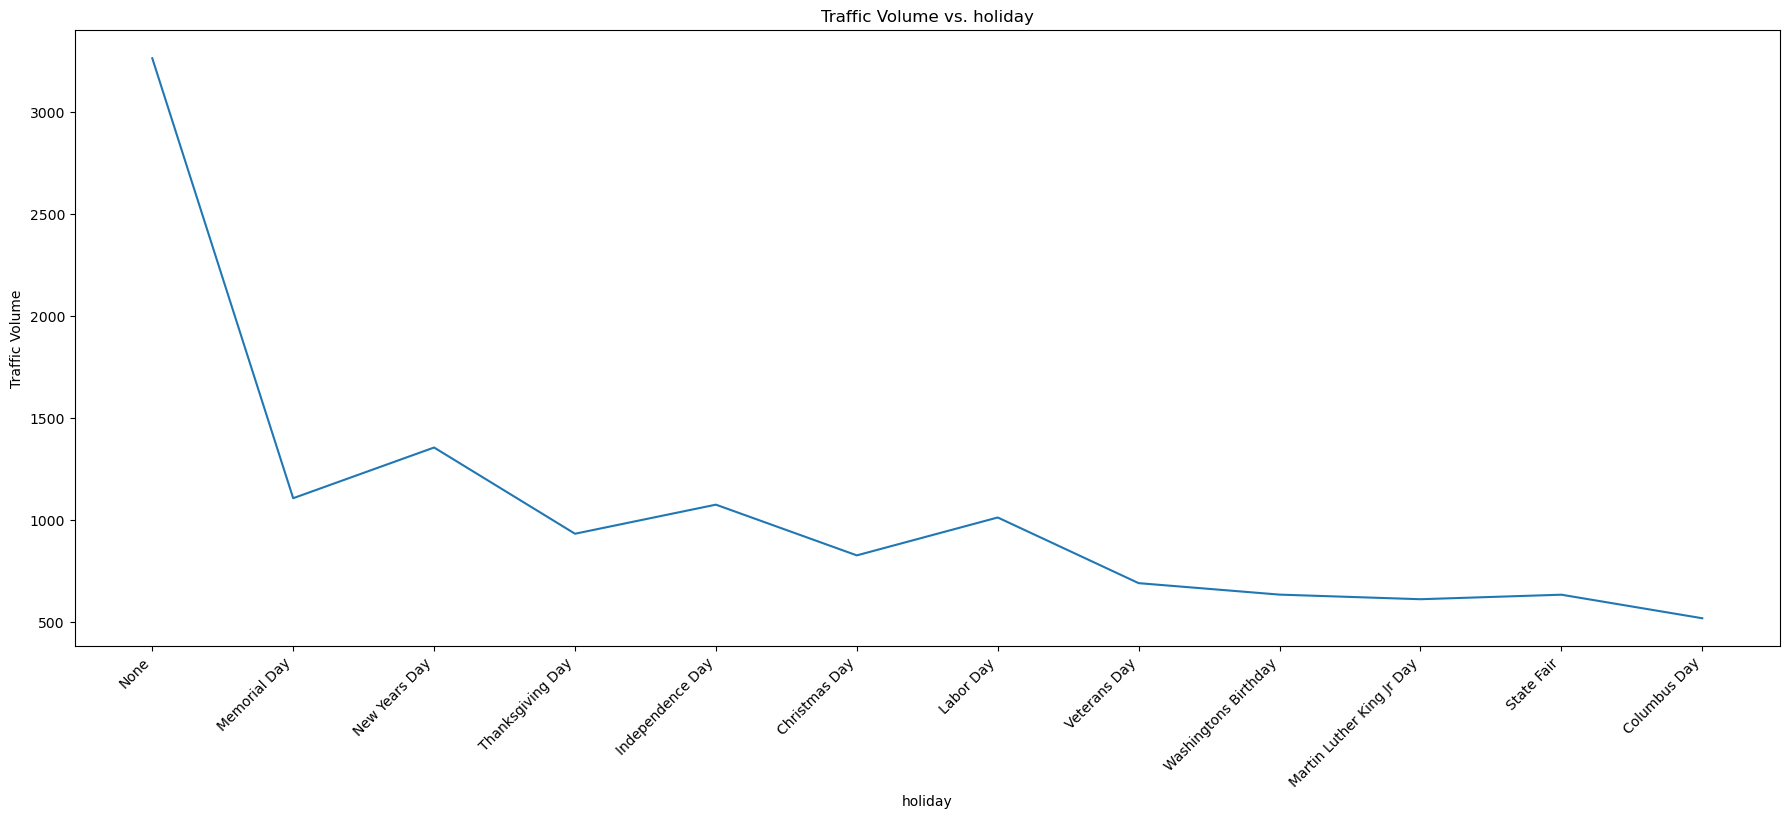

In [51]:
# Assuming 'new_df1' is your DataFrame
plt.figure(figsize=(22, 8))

# Using seaborn lineplot
sns.lineplot(data=new_df1, x='holiday', y='traffic_volume', ci=None)

# Adding labels and title
plt.xlabel('holiday')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume vs. holiday')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
new_df1

In [52]:
new_df1['year'] = new_df1['date_time'].dt.year

In [53]:
new_df1['day_of_month'] = new_df1['date_time'].dt.day

In [ ]:
new_df1

In [54]:
new_df2 = new_df1.drop(['date_time'], axis=1)

In [55]:
new_df2 = new_df2.drop(['weather_description'], axis=1)

In [ ]:
new_df2

In [56]:
new_df2['holi'] = np.where(new_df2['holiday'] == 'None',0,1)

In [ ]:
new_df2

In [57]:
new_df2 = new_df2.drop(['holiday'], axis=1)

In [ ]:
new_df2

In [58]:
# Assuming 'weather_main' is the column you want to one-hot encode
new_df2 = pd.get_dummies(new_df2, columns=['weather_main'], prefix='weather')


In [ ]:
new_df2

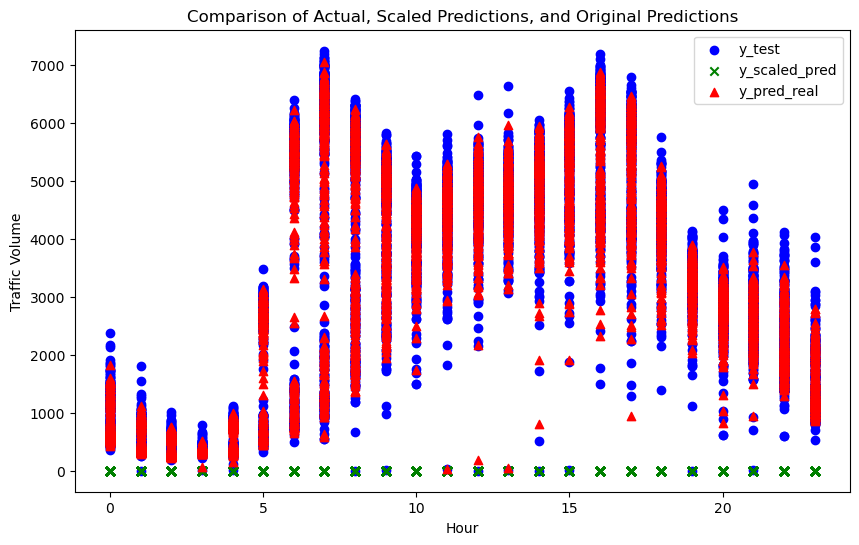

In [59]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler



# Splitting the data
X = new_df2.drop(['traffic_volume'], axis=1)  # Drop target variable and y_test
y = new_df2['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Standard scaling on the predictions
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Visualization
plt.figure(figsize=(10, 6))

# Plotting actual values
plt.scatter(X_test['hour'], y_test, label='y_test', color='blue')

# Plotting scaled predictions
plt.scatter(X_test['hour'], y_pred_scaled, label='y_scaled_pred', color='green', marker='x')

# Plotting original predictions
plt.scatter(X_test['hour'], y_pred, label='y_pred_real', color='red', marker='^')

# Adding labels and legend
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.title('Comparison of Actual, Scaled Predictions, and Original Predictions')

plt.show()


In [ ]:
new_df2.columns

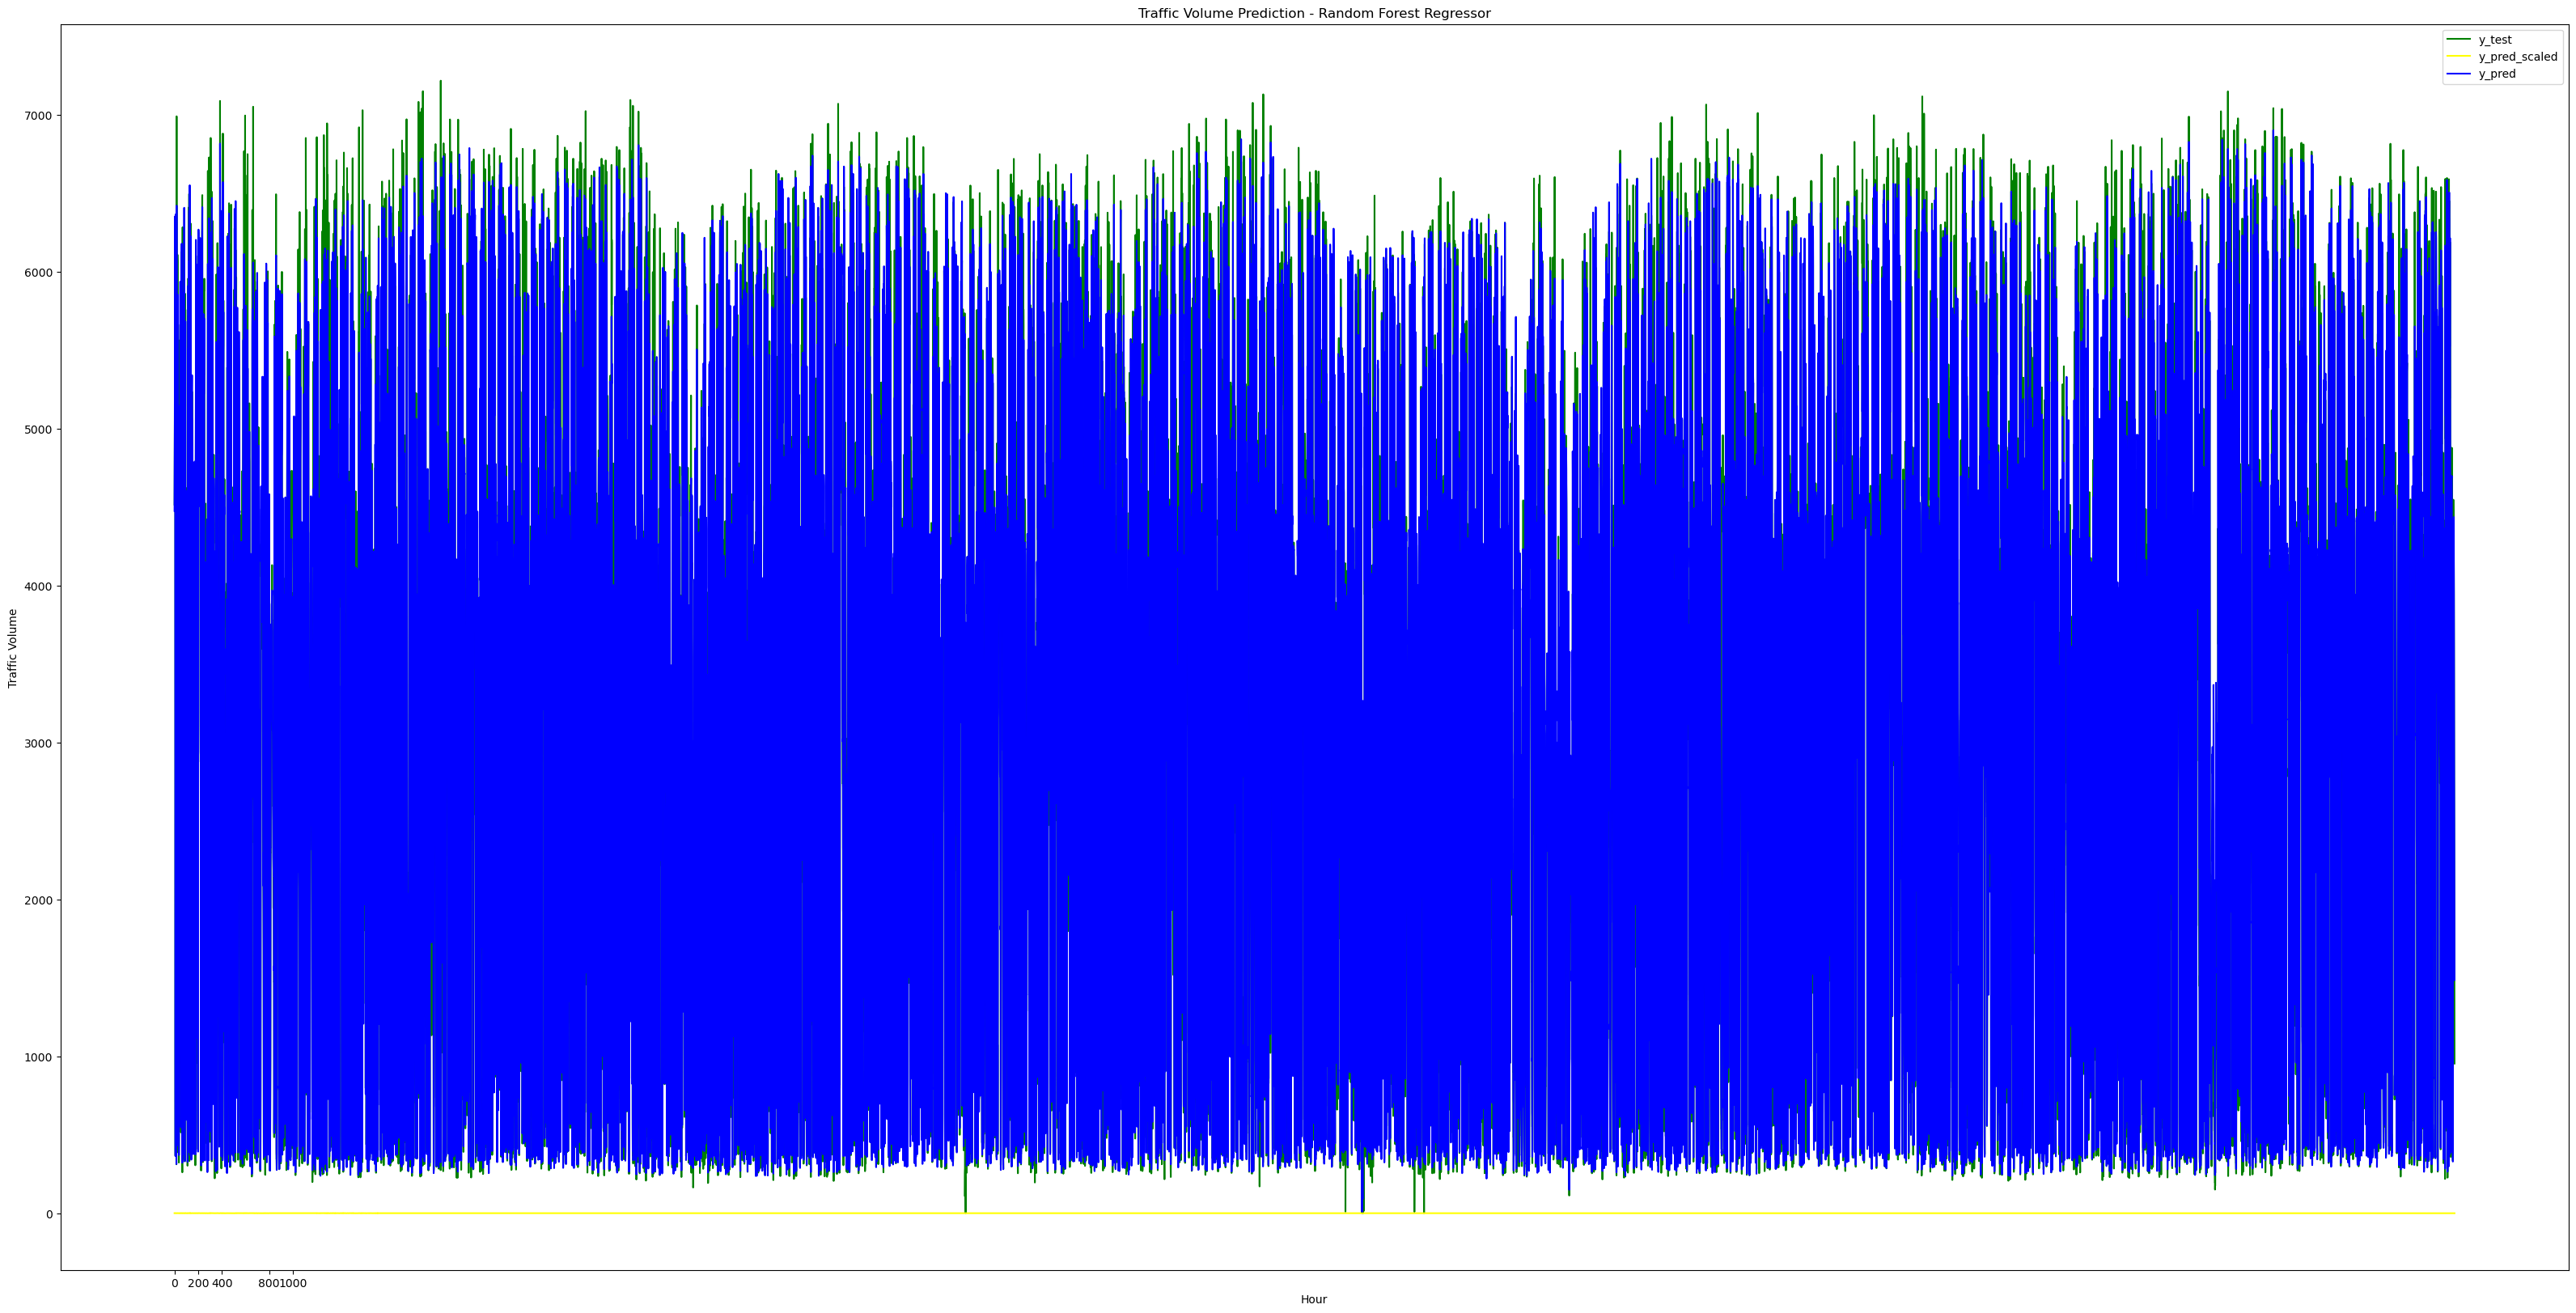

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'ndf' is your DataFrame containing the data
X = new_df2.drop(['traffic_volume'], axis=1)
y = new_df2['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get predictions on the test set
y_pred = rf_model.predict(X_test)

# Scale the predictions to the original range of traffic volume
scaler = MinMaxScaler()
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Sort the x-axis values for better visualization
sorted_indices = np.argsort(X_test.index)

# Plot the visualization
plt.figure(figsize=(40, 20))

# Plot y_test in green
plt.plot(np.arange(len(y_test)), y_test.iloc[sorted_indices], color='green', label='y_test')

# Plot y_pred_scaled in yellow
plt.plot(np.arange(len(y_test)), y_pred_scaled[sorted_indices], color='yellow', label='y_pred_scaled')

# Plot y_pred in blue
plt.plot(np.arange(len(y_test)), y_pred[sorted_indices], color='blue', label='y_pred')

# Customize the plot
plt.title('Traffic Volume Prediction - Random Forest Regressor')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks([0, 200, 400, 800, 1000])
plt.legend()
plt.show()


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming 'ndf' is your DataFrame containing the data
X = new_df2.drop(['traffic_volume'], axis=1)
y = new_df2['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

# Initialize the model (Random Forest Regressor in this case)
model = RandomForestRegressor(n_estimators=600, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2: {r2}")

Mean Absolute Error (MAE): 210.55760728982952
Mean Squared Error (MSE): 150082.9249173416
Root Mean Squared Error (RMSE): 387.40537543681756
R^2: 0.962122869096994


In [ ]:
# Assuming 'your_df' is your DataFrame
new_df2['new_column'] = new_df2['hour'] * new_df2['day_of_month']


In [ ]:
new_df2['new_column'].max()

In [ ]:
new_df2.drop(['new_column'], axis=1, inplace=True)


In [ ]:
new_df2

In [ ]:
new_df2.info()

In [ ]:
new_df2['holiday'] = new_df2['holi'].apply(lambda x: 1 if x == 'holiday' else 0)
new_df2['weekday'] = new_df2['day_of_week'].apply(lambda x: 1 if x < 5 else 0)  # Assuming Monday is 0 and Sunday is 6
new_df2['weekend'] = new_df2['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the original 'holi' column if needed
# df = df.drop(['holi'], axis=1)

# Display the updated DataFrame
print(new_df2.head())

In [ ]:
new_df2.drop(['holiday'], axis=1, inplace=True)

In [ ]:
new_df2.drop(['weekday'], axis=1, inplace=True)

In [ ]:
new_df2.drop(['weekend'], axis=1, inplace=True)

In [63]:

# Create a new column 'day_type' combining information about holidays, weekdays, and weekends
new_df2['day_type'] = new_df2.apply(lambda row: 'holiday' if row['holi'] == 'holiday' else ('weekend' if row['day_of_week'] >= 5 else 'weekday'), axis=1)

# Drop the original 'holi' column if needed
# df = df.drop(['holi'], axis=1)

# Display the updated DataFrame
print(new_df2.head())


        temp  rain_1h  snow_1h  clouds_all  traffic_volume  hour  day_of_week  \
36444  19.43      0.0      0.0           1            4072    23            5   
14182   8.05      0.0      0.0           1            4030    23            4   
35980  16.93      0.0      0.0           1            3893    23            5   
5846   15.93      0.0      0.0           1            3874    23            1   
48177   7.17      0.0      0.0          90            3856    23            5   

       month  year  day_of_month  ...  weather_Drizzle  weather_Fog  \
36444      8  2017            19  ...                0            0   
14182      5  2014             9  ...                0            0   
35980      8  2017             5  ...                0            0   
5846       5  2013             7  ...                0            0   
48177      9  2018            29  ...                0            0   

       weather_Haze  weather_Mist  weather_Rain  weather_Smoke  weather_Snow  \
36444 

In [64]:
new_df2['day_type'].unique()

array(['weekend', 'weekday'], dtype=object)

In [ ]:
new_df2['holi']

In [ ]:
new_df1['holiday'].unique()

In [ ]:
new_df1.info()

In [65]:
new_df1['day_type'] = new_df1.apply(lambda row: 'holiday' if row['holiday'] != 'None' else ('weekend' if row['day_of_week'] >= 5 else 'weekday'), axis=1)


In [66]:
new_df1

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month,year,day_of_month,day_type
36444,None,19.43,0.0,0.0,1,Clear,sky is clear,2017-08-19 23:00:00,4072,23,5,8,2017,19,weekend
14182,None,8.05,0.0,0.0,1,Clear,sky is clear,2014-05-09 23:00:00,4030,23,4,5,2014,9,weekday
35980,None,16.93,0.0,0.0,1,Clear,sky is clear,2017-08-05 23:00:00,3893,23,5,8,2017,5,weekend
5846,None,15.93,0.0,0.0,1,Clear,sky is clear,2013-05-07 23:00:00,3874,23,1,5,2013,7,weekday
48177,None,7.17,0.0,0.0,90,Clouds,overcast clouds,2018-09-29 23:00:00,3856,23,5,9,2018,29,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,None,8.70,0.0,0.0,1,Clear,sky is clear,2016-05-02 00:00:00,171,0,0,5,2016,2,weekday
26224,None,14.75,0.0,0.0,1,Clear,sky is clear,2016-09-01 00:00:00,11,0,3,9,2016,1,weekday
26439,None,20.81,0.0,0.0,1,Clear,sky is clear,2016-09-08 00:00:00,7,0,3,9,2016,8,weekday
25157,None,22.70,0.0,0.0,1,Mist,mist,2016-07-23 00:00:00,6,0,5,7,2016,23,weekend


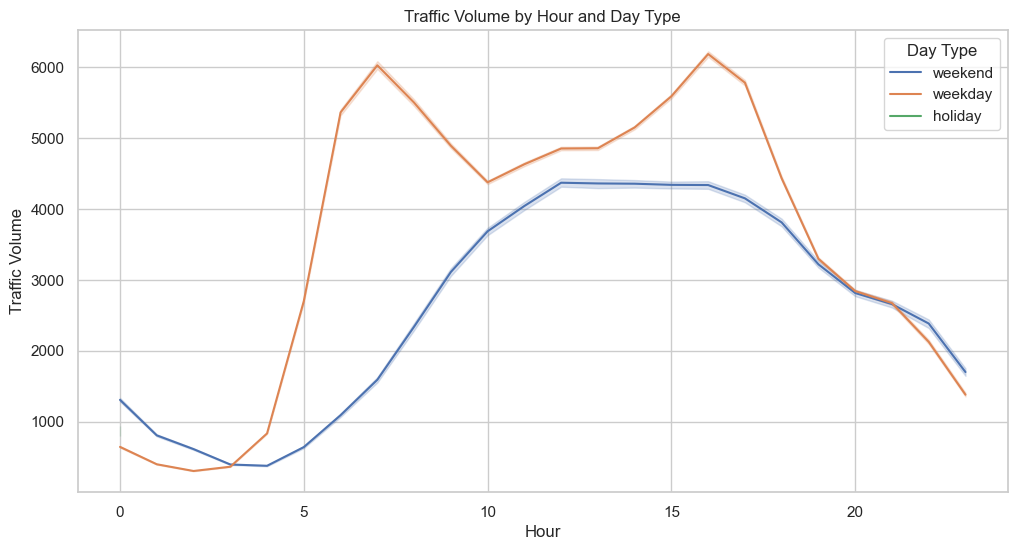

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'traffic_volume' and 'day_type' columns
# If you don't have seaborn installed, you can install it using: pip install seaborn

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='traffic_volume', hue='day_type', data=new_df1)

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Hour and Day Type')

# Show the legend
plt.legend(title='Day Type')

# Show the plot
plt.show()


['weekend' 'weekday' 'holiday']


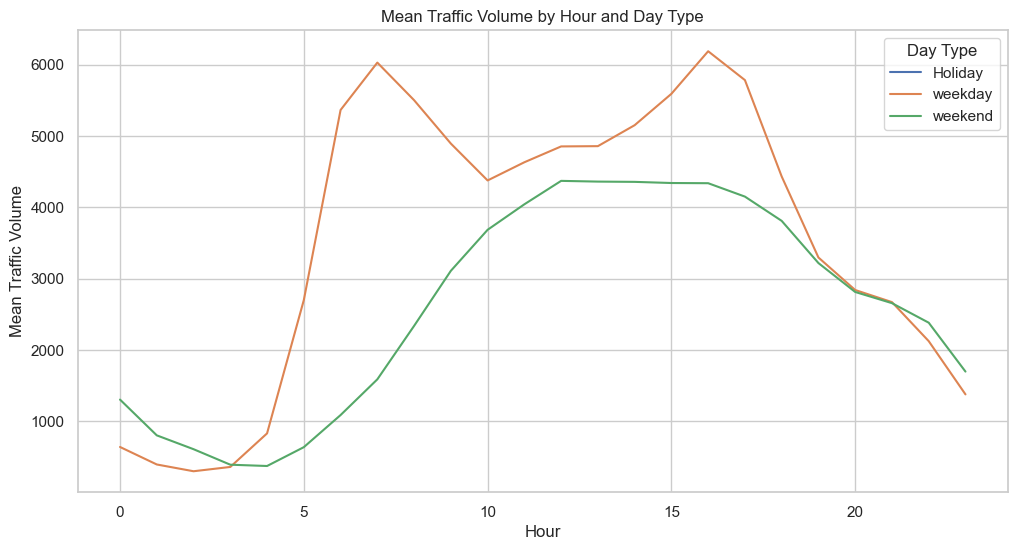

In [68]:
# Check unique values in 'day_type' column
print(new_df1['day_type'].unique())

# Replace any variations of 'holiday' with a consistent label
new_df1['day_type'] = new_df1['day_type'].replace(['Holiday', 'holiday', 'Holidays'], 'Holiday')

# Calculate the mean of traffic volume for each hour and day type
mean_traffic = new_df1.groupby(['hour', 'day_type'])['traffic_volume'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the line graph for mean traffic volume
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='traffic_volume', hue='day_type', data=mean_traffic)

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Traffic Volume')
plt.title('Mean Traffic Volume by Hour and Day Type')

# Show the legend
plt.legend(title='Day Type')

# Show the plot
plt.show()

In [ ]:
new_df1['day_type'].unique()

In [ ]:
new_df1[new_df1['day_type'] == 'holiday']

# 5

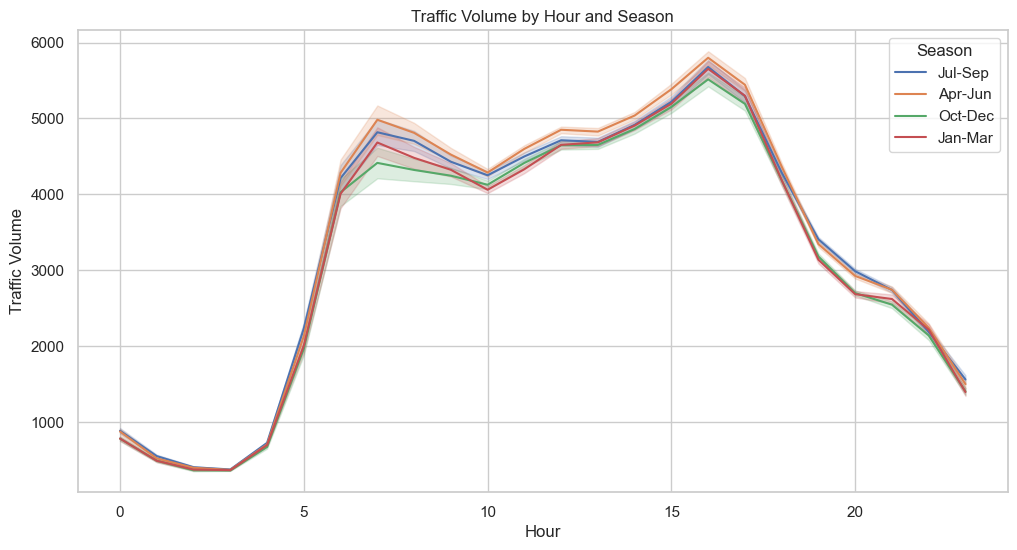

In [69]:
# Create a new column 'season' based on the month
new_df1['season'] = new_df1['month'].apply(lambda x: 'Jan-Mar' if 1 <= x <= 3 else ('Apr-Jun' if 4 <= x <= 6 else ('Jul-Sep' if 7 <= x <= 9 else 'Oct-Dec')))

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='traffic_volume', hue='season', data=new_df1)

# Adding labels and title
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Hour and Season')

# Show the legend
plt.legend(title='Season')

# Show the plot
plt.show()

# 6 

In [ ]:
# # Here, standardizing 'temp', 'rain_1h', 'snow_1h', and 'clouds_all'

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# ndf[['temp', 'rain_1h', 'snow_1h', 'clouds_all']] = scaler.fit_transform(ndf[['temp', 'rain_1h', 'snow_1h', 'clouds_all']])

# 7

Key Differences:

Temporal Aspect: Time series data explicitly includes a temporal aspect, capturing changes over time. In contrast, image and tabular data might lack a time component.

Data Representation: Time series data is represented as a sequence of timestamped values, while image data is structured as pixel grids, and tabular data is organized in rows and columns.

Analysis Techniques: Analyzing time series data often involves time-dependent methods, such as trend analysis, seasonality detection, and forecasting. Image data might require techniques like convolutional neural networks (CNNs) for feature extraction. Tabular data may use various statistical and machine learning methods depending on the task.

# 8

In [ ]:
new_df2.info()


<Figure size 2000x1000 with 0 Axes>

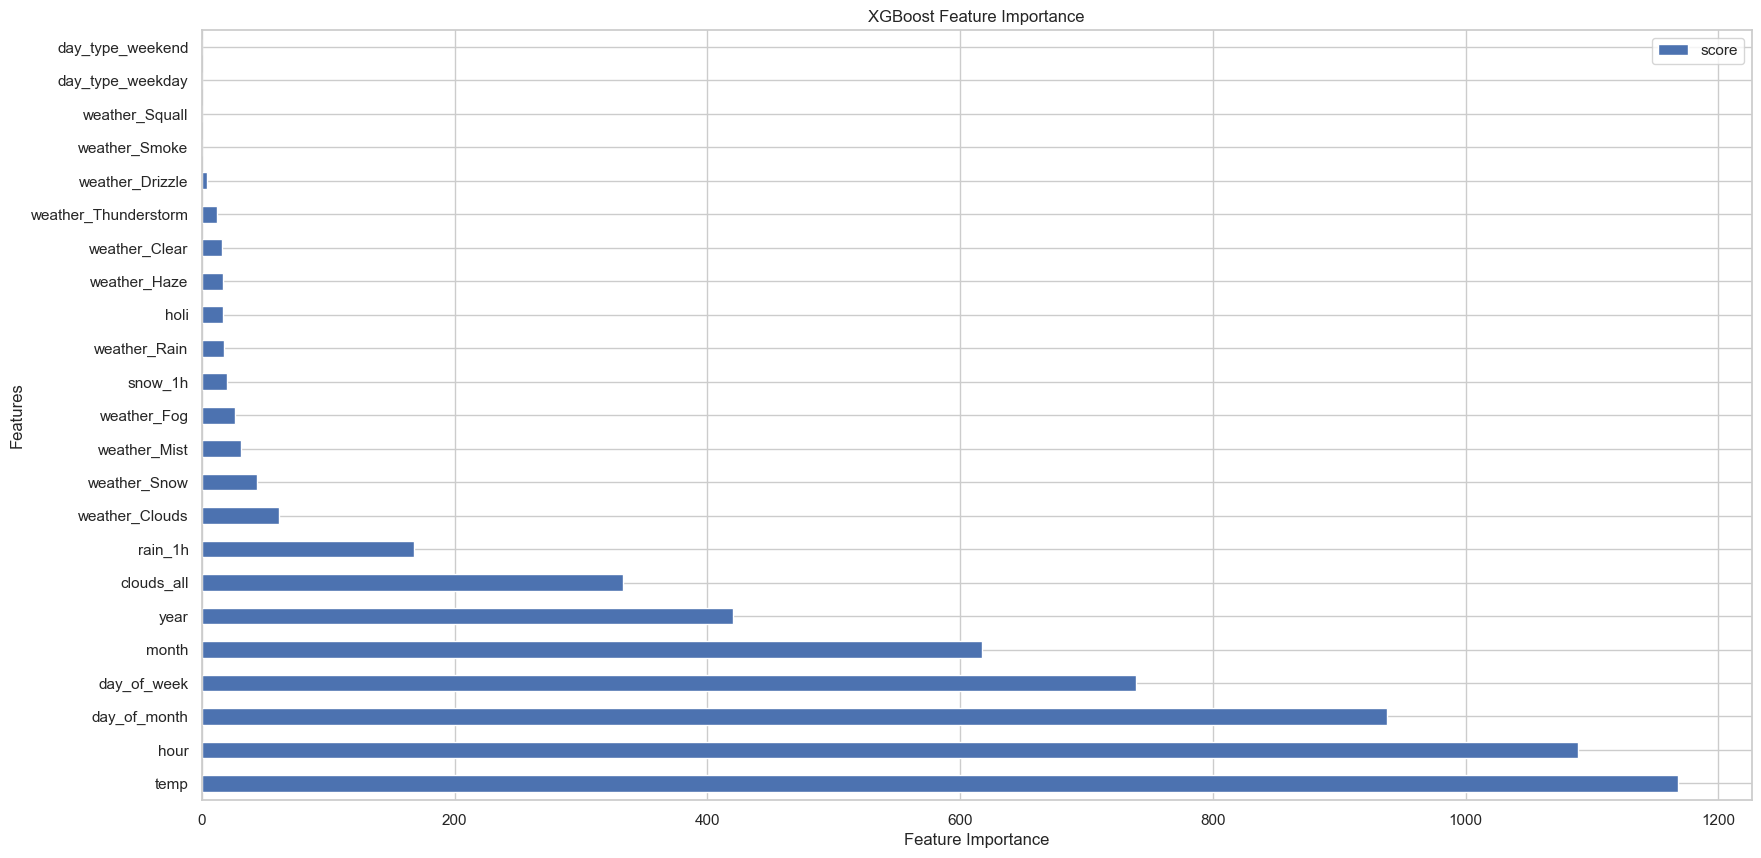

NameError: name 'ndf' is not defined

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming 'new_df2' is your DataFrame with 'traffic_volume' and other features
# Encode categorical columns (one-hot encoding)
new_df2_encoded = pd.get_dummies(new_df2, columns=['day_type'])

# Separate features and target variable
X = new_df2_encoded.drop(['traffic_volume'], axis=1)
y = new_df2_encoded['traffic_volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Define the keys you are interested in
keys = X.columns

# Extract values based on keys
values = [feature_importance.get(key, 0) for key in keys]

# Create a DataFrame for plotting
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)

# Plotting feature importance
plt.figure(figsize=(20, 10))
data.nlargest(40, columns="score").plot(kind='barh', figsize=(20, 10))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()



# 9

In [ ]:
new_df1.info()

In [ ]:


from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame with a 'traffic_volume' column
result = seasonal_decompose(x=new_df1['traffic_volume'].iloc[:500], period=24, model='additive')

# Plot the decomposition
result.plot()

# Print the components
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame with a 'date_time' column

new_df1.set_index('date_time', inplace=True)

# Select the first 500 hours
data_subset = new_df1['traffic_volume'].iloc[:500]

# Perform seasonal decomposition
result = seasonal_decompose(x=data_subset, period=24, model='additive')

# Plot the decomposition
result.plot()

# Print the components
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)


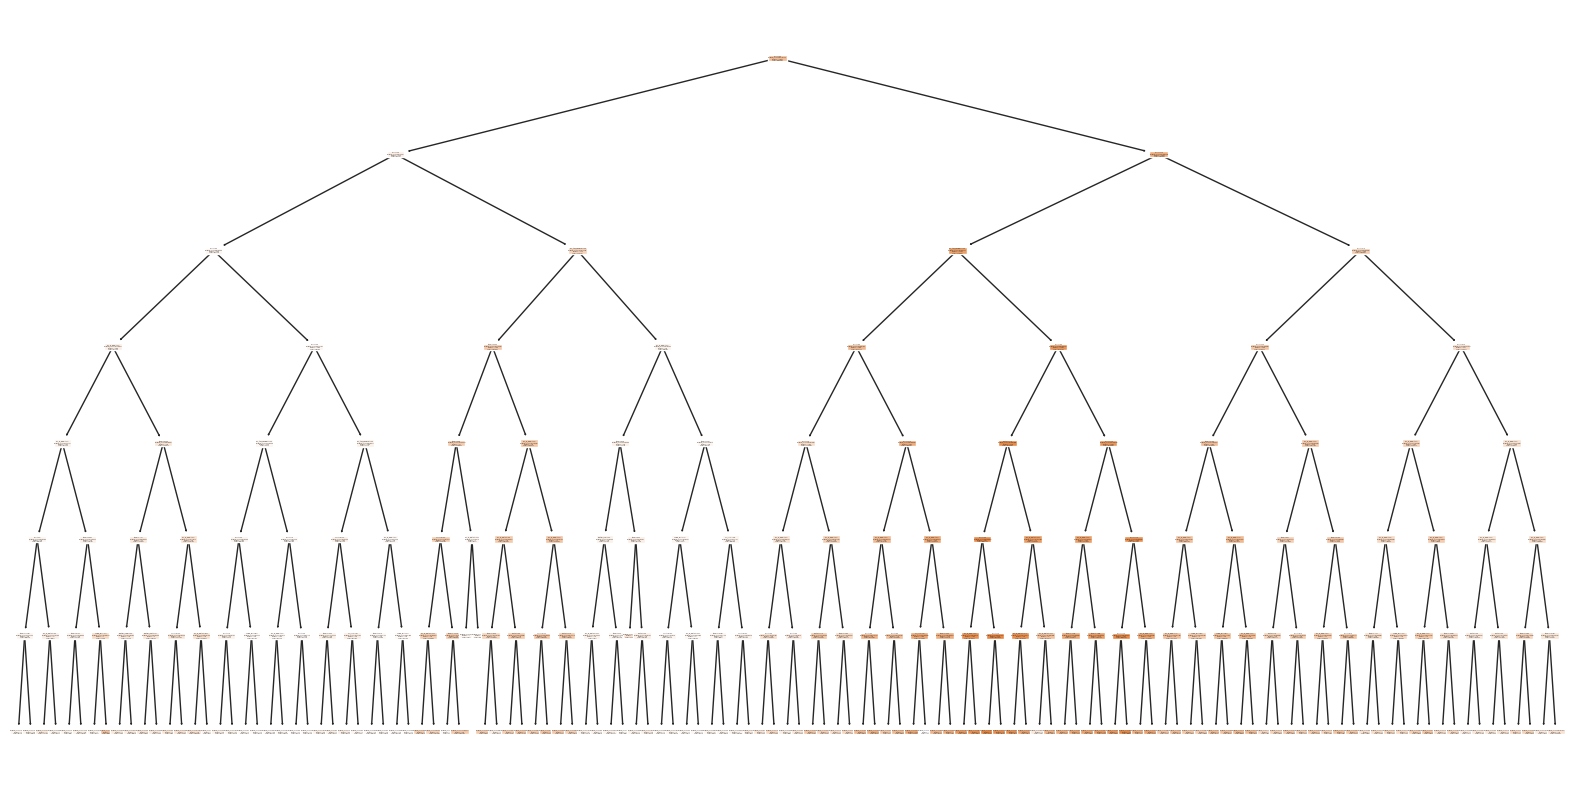

In [71]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train a Decision Tree Regressor
fitted_dt_surrogate = DecisionTreeRegressor(max_depth=7, random_state=42)
fitted_dt_surrogate.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_dt_surrogate, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()


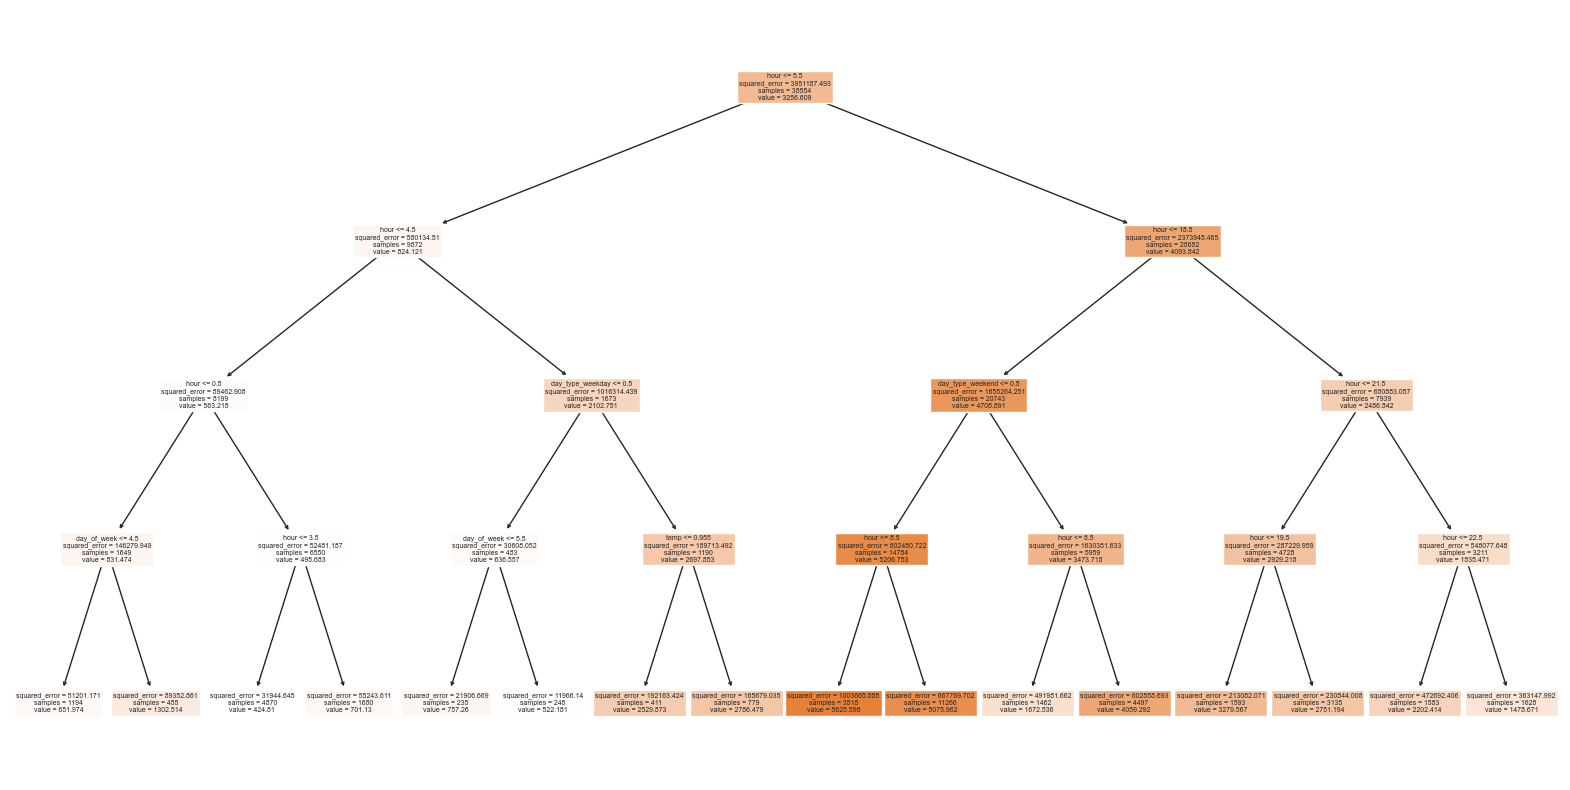

In [72]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train a Decision Tree Regressor
fitted_dt_surrogate = DecisionTreeRegressor(max_depth=4, random_state=42)
fitted_dt_surrogate.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_dt_surrogate, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()


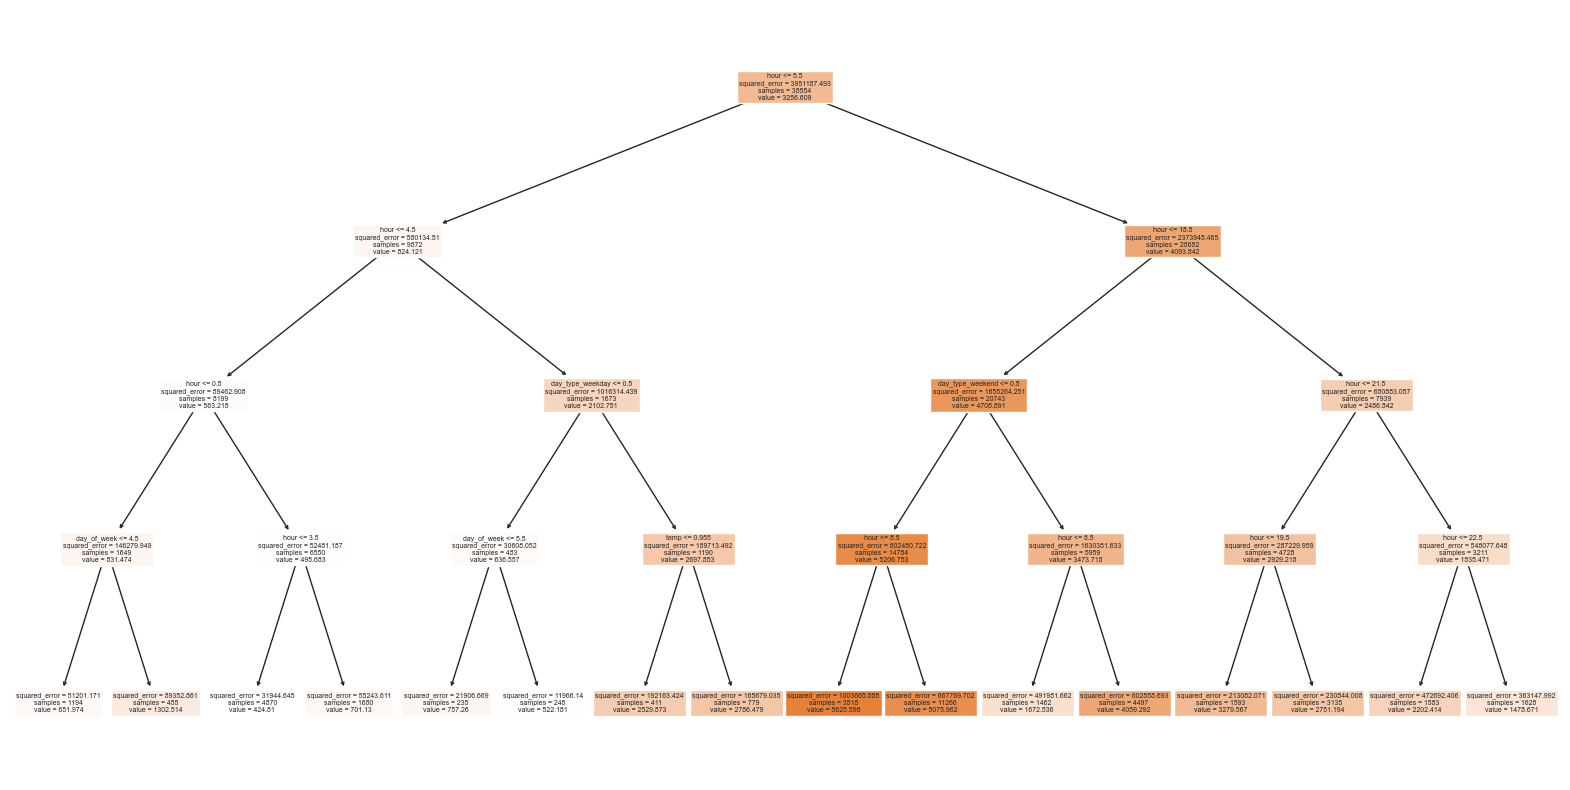

In [73]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Train a Decision Tree Regressor
fitted_dt_surrogate = DecisionTreeRegressor(max_depth=4, random_state=42)
fitted_dt_surrogate.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(fitted_dt_surrogate, filled=True, feature_names=list(X_train.columns), class_names=["Class 0", "Class 1"])
plt.show()
